In [1]:
pip install finterstellar

In [1]:
import finterstellar as fs

In [2]:
df = fs.fn_single(otp='OTP', symbol='F', window='T')

In [3]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

In [4]:
df['Avg Assets'] = ( df['Total Assets'] + df['Total Assets'].shift(4) ) / 2

In [5]:
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']

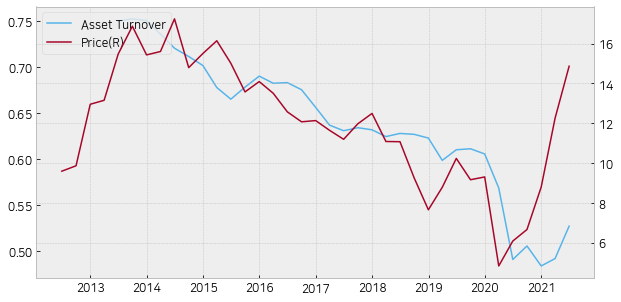

In [6]:
fs.draw_chart(df, left='Asset Turnover', right='Price')

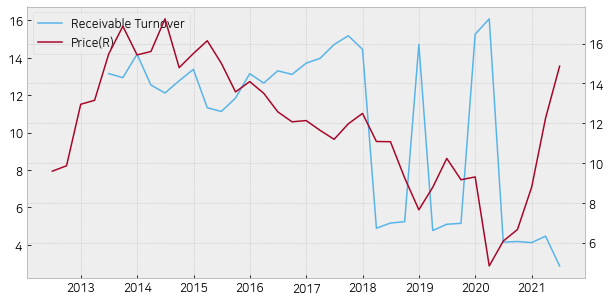

In [7]:
df['Avg Receivables'] = ( df['Receivables'] + df['Receivables'].shift(4) ) / 2
df['Receivable Turnover'] = df['Revenue'] / df['Avg Receivables']
fs.draw_chart(df, left='Receivable Turnover', right='Price')

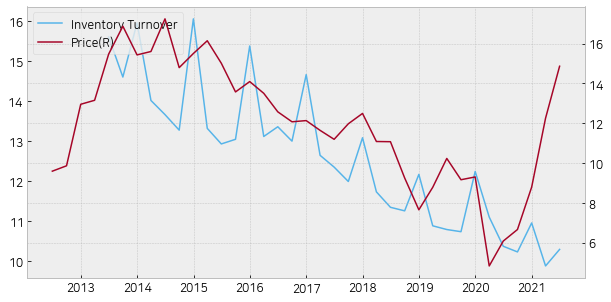

In [8]:
df['Avg Inventory'] = ( df['Inventory'] + df['Inventory'].shift(4) ) / 2
df['Inventory Turnover'] = df['COGS'] / df['Avg Inventory']
fs.draw_chart(df, left='Inventory Turnover', right='Price')

In [9]:
# Asset Turnover
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']   
    s[t] = fs.fn_filter(data[t], by='Asset Turnover', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 17.19%
Accumulated return: 389.04%
Investment period: 10.0yrs
Sharpe ratio: 1.52
MDD: -23.82%


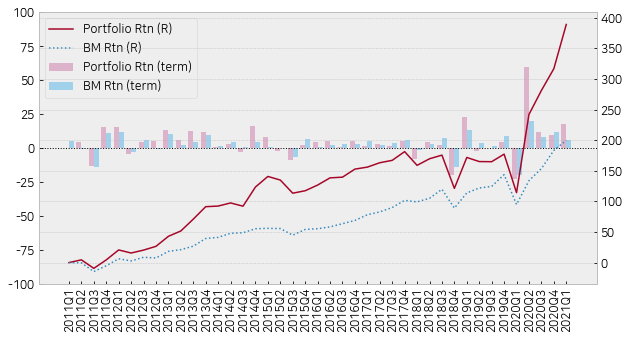

In [10]:
fs.draw_return(df)

In [14]:
# GP/E
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'GP/E'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='GP/E', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 16.83%
Accumulated return: 374.48%
Investment period: 10.0yrs
Sharpe ratio: 1.45
MDD: -35.25%


In [19]:
# S/E, Equity Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    s[t] = fs.fn_filter(data[t], by='Equity Turnover', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 21.40%
Accumulated return: 596.64%
Investment period: 10.0yrs
Sharpe ratio: 2.20
MDD: -29.85%


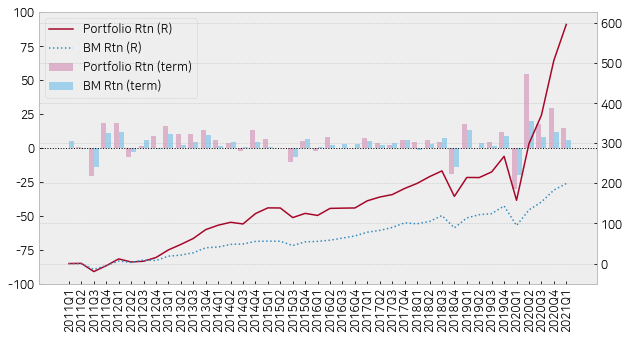

In [20]:
fs.draw_return(df)

In [21]:
# Receivable Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Receivables'] = ( data[t]['Receivables'] + data[prev_t]['Receivables'] ) / 2
    data[t]['Receivable Turnover'] = data[t]['Revenue'] / data[t]['Avg Receivables']
    s[t] = fs.fn_filter(data[t], by='Receivable Turnover', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 16.57%
Accumulated return: 363.97%
Investment period: 10.0yrs
Sharpe ratio: 1.35
MDD: -32.84%


In [22]:
# Inventory Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Inventory'] = ( data[t]['Inventory'] + data[prev_t]['Inventory'] ) / 2
    data[t]['Inventory Turnover'] = data[t]['COGS'] / data[t]['Avg Inventory']
    s[t] = fs.fn_filter(data[t], by='Inventory Turnover', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 15.13%
Accumulated return: 309.58%
Investment period: 10.0yrs
Sharpe ratio: 1.40
MDD: -30.15%


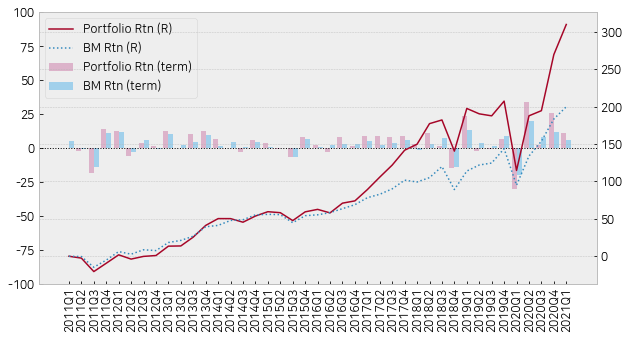

In [13]:
fs.draw_return(df)